<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_12_keras_%EB%A7%9B%EB%B3%B4%EA%B8%B0_(%EC%9C%A0%EB%B0%A9%EC%95%94_%ED%99%98%EC%9E%90_%EC%83%9D%EC%A1%B4%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 환자 데이터를 바탕으로 유방암인지 아닌지를 구분해보자!
- 신경망을 활용하여 2진 분류 문제를 해결해보자!


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
X = data.data
y = data.target

In [5]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [6]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test,y_train, y_test = train_test_split(X,y, random_state=3)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


### 신경망을 직접 설계해보자!
- 1. 신경망 구조 설계
- 2. 학습/평가 방법 설정
- 3. 학습 및 시각화
- 4. 평가

In [22]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential  # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성
from tensorflow.keras.layers import InputLayer,Dense

In [31]:
# 신경망의 뼈대를 설정
model = Sequential()

# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model.add(Dense(10,input_dim=30,activation="sigmoid"))

# 중간층
model.add(Dense(6,activation="sigmoid"))   # 하나의 층
model.add(Dense(4, activation="sigmoid"))   # 하나의 층

# 출력층
# 출력층은 회귀의 활성화 함수(linear 함수, 활성화 함수 생략가능)
# 2진 분류 (sigmoid 함수)
model.add(Dense(1, activation="sigmoid")) 

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 2. 학습/ 평가 방법 설정
# binary_crosstentropy : 2진 분류에 사용하는 손실함수 (비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하게 되는 방식
model.compile (loss ="binary_crossentropy",
               optimizer = 'adam',            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [39]:
h = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6604 - acc: 0.6268
Epoch 2/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6601 - acc: 0.6268
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6602 - acc: 0.6268
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6599 - acc: 0.6268
Epoch 5/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6601 - acc: 0.6268
Epoch 6/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6595 - acc: 0.6268
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6594 - acc: 0.6268
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6591 - acc: 0.6268
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6590 - acc: 0.6268
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6586 - acc: 0.6268
Epoch 11/100
14/14 [==============================] - 0s 1m

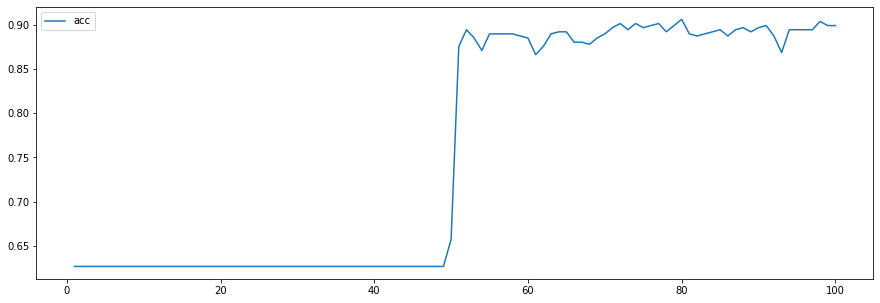

In [40]:
# 시각화
plt.figure(figsize=(15,5))

plt.plot(range(1,101),
         h.history['acc'],
         label ='acc'
         )

plt.legend()
plt.show()

In [41]:
# 모델 평가
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.3086 - acc: 0.9231


[0.30863437056541443, 0.9230769276618958]